## Зачем нужен скрытый слой?

Перейдём теперь к чуть более сложной задаче. Пусть объекты двух классов (кружочки и крестики) сосредоточены по углам пространства признаков так, как на рисунке. Одной гиперплоскостью (линией) эти два класса разделить нельзя. Иногда такую задачу называют разделяющим ИЛИ (xor). Эта логическая операция равна истине (единице) только, если один из аргументов равен истине, а второй лжи (нулю): 

<img src="images/LessonsII/XOR.png" alt="hyper_neuron" height=20% width=20%>

In [ ]:
(0,0) -> 0
(0,1) -> 1
(1,0) -> 1
(1,1) -> 0

Чтобы провести классификацию, необходима нейронная сеть с одним скрытым слоем. Ниже на первом графике (в осях признаков x1 и x2) показаны две гиперплоскости (линии A и B). Они соответствуют двум скрытым нейронам A и B. Значения выходов нейронов приведены на втором графике (оси yA и yB). 

<img src="images/LessonsII/hiden_layer.png" alt="hiden_layer" height=50% width=50%>

Кружок с признаками (0,0) из верхнего левого угла плоскости $x_1, x_2$ даст на выходах нейронов $y_A~0, y_B~1$ (этот объект лежит против вектора нормали плоскости A и по вектору нормали плоскости B). Второй кружок с признаками (1,1) даст на выходах нейронов значения $y_A~1, y_B~0$. Получившееся "деформированное" пространство признаков $y_A$ и $y_B$ (второй график) уже легко разделить одной плоскостью C, которая и будет выходным нейроном сети.

Ниже приведен реальный пример нейронной сети, обученной распознавать два класса объектов, каждый из которых разбивается на два кластера: 

<img src="images/LessonsII/xor_net.png" alt="xor_net" height=40% width=40%>

Каждый слой сети преобразует входное пространство признаков в некоторое другое пространство, возможно, с иной размерностью. Такое нелинейное преобразование происходит до тех пор, пока классы не оказываются линейно разделимыми нейронами выходного слоя. 

#### 4 Варианта XOR

<img src="images/LessonsII/4_xor.png" alt="xor_net" height=60% width=60%>

Последний ряд картинок - это карты выхода реально обученных нейронных сетей.

## Аппроксимация функции f(x)

При помощи нейронной сети с одним входом, одним выходом и достаточно большим скрытым слоем, можно аппроксимировать любую функцию y=f(x). Для доказательства, создадим сначала сеть, которая на выходе даёт 1, если вход лежит в диапазоне [a...b] и 0 - в противном случае.


Пусть σ(d) = S(ω·d) - сигмоидная функция, аргумент которой умножен на большое число ω, так что получается прямоугольная ступенька. При помощи двух таких ступенек, можно создать столбик единичной высоты: 

<img src="images/LessonsII/2_neurons.png" alt="2_neurons" height=60% width=60%>

Нормируем аппроксимируемую функцию y=f(x) на интервал [0...1] как для её аргумента x, так и для значения y. Разобъём диапазон изменения x=[0...1] на большое число интервалов (не обязательно равных). На каждом интервале функция должна меняется незначительно. Ниже приведено два таких интервала: 


<img src="images/LessonsII/4_neurons.png" alt="2_neurons" height=60% width=60%>


Каждая пара нейронов в скрытом слое реализует единичный столбик. Величина d равна $w_1$, если x∈(a,b) и $w_2$, если x∈(b,с). Если выходной нейрон является линейным сумматором, то можно положить $w_i=f_i$, где $f_i$ - значения функции на каждом интервале. Если же выходной нейрон - обычный нелинейный элемент, то необходимо пересчитать веса $w_i$ при помощи обратной к сигмоиду функции (последняя формула).

In [3]:
import numpy as np                    # библиотека численных методов 
import matplotlib.pyplot as plt       # библиотека рисования графиков

x1: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] 
x2: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


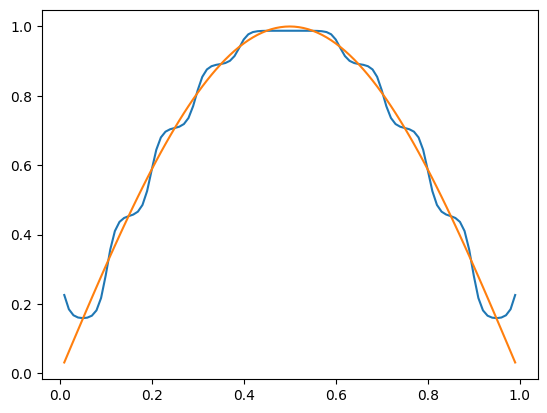

In [5]:
# Аппроксимация функции на Phyton

def F(x):                             # эту функцию аппроксимируем
    return np.sin(np.pi*x);
 
n=10                                  # число интервалов
x1 = np.arange(0,   1,     1/n)       # координаты левых границ
x2 = np.arange(1/n, 1+1/n, 1/n)       # координаты правых границ
print("x1:",x1,"\nx2:",x2)            # выводим эти массивы
 
f  = F( (x1+x2)/2 )                   # функция в середине интервала
fi = np.log( f/(1-f) )                # обратные значения к сигмоиду
 
def S(z, z0, s):                      # сигмоид
    return 1/(1+np.exp(-100*s*(z-z0)))
 
def Net(z):                           # выход сети
    return 1/(1+np.exp(-np.dot(fi, S(z, x1, 1) + S(z, x2, -1) -1)))
 
x = np.arange(0.01, 1, 0.01)          # массив x-ов
y = [ Net(z)  for z in x ]            # массив y-ов (выход сети)
 
plt.plot(x, y)                        # результаты работы
plt.plot(x, F(x))                     # исходная функция
plt.show()                            # показываем картинку